# Introduction to `pandas` 

By the end of this notebook, you should be able to:

- Use `pandas` to import CSV data and create a data frame
- Performn exploratory data analysis using `pandas`, e.g. summary statistics and simple plots
- Export a `pandas` data frame to a CSV file


## What is `pandas` (Python Data Analysis Library)

`pandas` is a very useful library for doing any kind of data cleaning or data preparation. It also allows us to calculate summary statistics and easily construct common plots for fast exploratory data analysis.

[![iconic trio](../../assets/iconic_trio.png)](https://twitter.com/vboykis/status/1032631145035427840)

Pandas takes in data, like Excel spreadsheets or CSVs, and turns them into a Python object called a **data frame** with rows and columns, which is almost always easier to work with compared to pure Python lists or numpy arrays. You might already be familiar with the concept of data frames from your `R` labs in STAT 251 (Elementary Statistics).

Let's dive right into `pandas` with a simple example:

## 1.  Data Source

For the purpose of this example, we're going to grab weather data from [Environment Canada](http://climate.weather.gc.ca/historical_data/search_historic_data_e.html) for our analysis. To be specific, we'll download July 2018 weather data for Vancouver, BC as a CSV file from [this link](http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=51442&Year=2018&Month=07&timeframe=1).

![pandas_logo](../../assets/pandas_logo.png)

If you open the CSV file in Excel, you’ll notice that it contains 16 rows of information and the actual weather data begins at row 17. We'll tell `pandas` this information so it can parse the csv file properly.

P/S: `pandas` will download the .csv data automatically for you using `read_csv`, isn't that cool?

In [1]:
import pandas as pd # It's common practice to import pandas and call it pd.
source = 'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=51442&Year=2018&Month=07&timeframe=1'

Let's read our data and store it in a data frame called `df`. We'll tell pandas to skip the first 15 rows.

In [2]:
df = pd.read_csv(source, skiprows=15)

Now, we'll take a look at what we have in the first 5 rows using .head().

In [3]:
df.head()

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2018-07-01 00:00,2018,7,1,00:00,14.1,NaN,11.9,NaN,86.0,...,NaN,32.2,NaN,101.98,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-01 01:00,2018,7,1,01:00,14.3,NaN,12.1,NaN,87.0,...,NaN,32.2,NaN,101.99,NaN,NaN,NaN,NaN,NaN,Cloudy
2,2018-07-01 02:00,2018,7,1,02:00,14.3,NaN,11.8,NaN,85.0,...,NaN,32.2,NaN,101.97,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-01 03:00,2018,7,1,03:00,14.2,NaN,11.8,NaN,85.0,...,NaN,32.2,NaN,101.97,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-01 04:00,2018,7,1,04:00,13.9,NaN,11.8,NaN,87.0,...,NaN,32.2,NaN,101.99,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy


To take a look at more rows we can pass a number to `head()`. For example, here's 10 rows:

In [4]:
df.head(10)

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2018-07-01 00:00,2018,7,1,00:00,14.1,NaN,11.9,NaN,86.0,...,NaN,32.2,NaN,101.98,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-01 01:00,2018,7,1,01:00,14.3,NaN,12.1,NaN,87.0,...,NaN,32.2,NaN,101.99,NaN,NaN,NaN,NaN,NaN,Cloudy
2,2018-07-01 02:00,2018,7,1,02:00,14.3,NaN,11.8,NaN,85.0,...,NaN,32.2,NaN,101.97,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-01 03:00,2018,7,1,03:00,14.2,NaN,11.8,NaN,85.0,...,NaN,32.2,NaN,101.97,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-01 04:00,2018,7,1,04:00,13.9,NaN,11.8,NaN,87.0,...,NaN,32.2,NaN,101.99,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
5,2018-07-01 05:00,2018,7,1,05:00,14.0,NaN,12.1,NaN,88.0,...,NaN,32.2,NaN,102.02,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-07-01 06:00,2018,7,1,06:00,14.4,NaN,12.2,NaN,86.0,...,NaN,24.1,NaN,102.05,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-07-01 07:00,2018,7,1,07:00,14.6,NaN,13.1,NaN,90.0,...,NaN,32.2,NaN,102.07,NaN,NaN,NaN,NaN,NaN,Cloudy
8,2018-07-01 08:00,2018,7,1,08:00,15.6,NaN,13.3,NaN,86.0,...,NaN,32.2,NaN,102.08,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-07-01 09:00,2018,7,1,09:00,17.1,NaN,14.4,NaN,84.0,...,NaN,32.2,NaN,102.08,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Preparation

For the purpose of this tutorial, we'll only use the Date/Time column and the Temp (°C) column for our analysis. Let's copy it to a different data frame.

In [5]:
data = df[['Date/Time', 'Temp (°C)']].copy() # We explicitly tell pandas that we want to make a copy
data.head()

,Date/Time,Temp (°C)
0,2018-07-01 00:00,14.1
1,2018-07-01 01:00,14.3
2,2018-07-01 02:00,14.3
3,2018-07-01 03:00,14.2
4,2018-07-01 04:00,13.9


We'll need to tell `pandas` what kind of data we have in the data frame. Pandas will try to guess the data type, but if it's unable to, they will be parsed as generic 'objects', as you can see with the dtype:

In [6]:
print(data['Date/Time'].dtype)
print(data['Temp (°C)'].dtype)

object
float64


In [7]:
# We know that the first column is a datetime column:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
print(data['Date/Time'].dtype)

datetime64[ns]


Since the temperature is already parsed correctly as a numeric float, we don't need to change its data type.

## 3. Data Inspection

Let's take a quick look at our data. It's really easy with `pandas`.

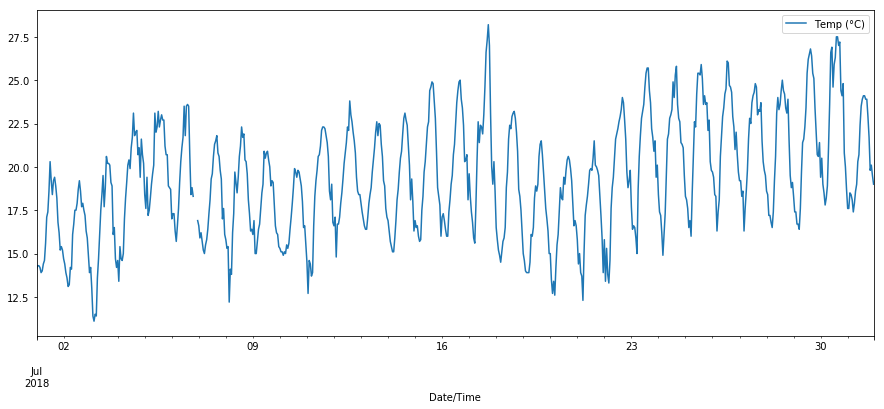

In [8]:
%matplotlib inline
data.plot(x='Date/Time', y='Temp (°C)', figsize=(15,6))

Notice that we have some gaps in the data, as indicated by the broken lines. To figure out where those gaps are, we'll look for NaN (Not a Number) values.

In [9]:
# data['Temp (°C)'].isnull() will return a series of True/False values for each row. True if the temperaeture is NaN.
# We will then use data.loc[] to return only the rows which are True
data.loc[data['Temp (°C)'].isnull()]

,Date/Time,Temp (°C)
140,2018-07-06 20:00:00,NaN
141,2018-07-06 21:00:00,NaN
142,2018-07-06 22:00:00,NaN


Looks like it's only a few rows with this issue!

## 4. Data Cleaning

Let's do some interpolation to fill in the blanks for row #177.

By default, `interpolate()` will use linear interpolation to fill in the gaps. We'll store the data in a new column called `'Temp Interpolated (°C)'`. Notice that's very easy to create new columns:

In [10]:
data['Temp Interpolated (°C)'] = data['Temp (°C)'].interpolate()
data.head()

,Date/Time,Temp (°C),Temp Interpolated (°C)
0,2018-07-01 00:00:00,14.1,14.1
1,2018-07-01 01:00:00,14.3,14.3
2,2018-07-01 02:00:00,14.3,14.3
3,2018-07-01 03:00:00,14.2,14.2
4,2018-07-01 04:00:00,13.9,13.9


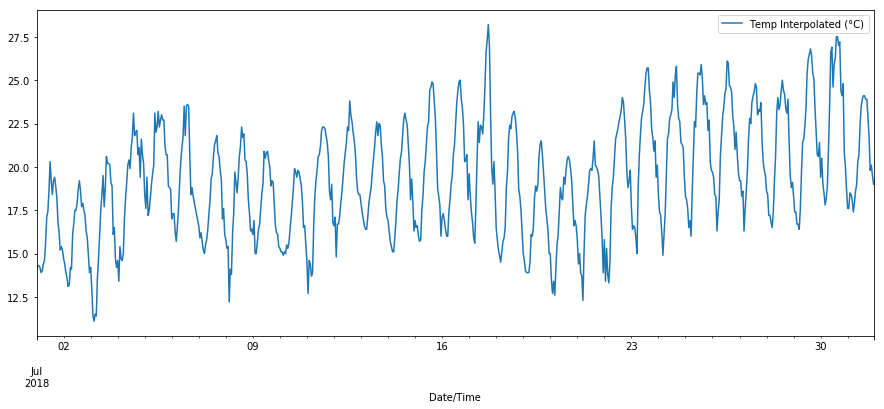

In [11]:
data.plot(x='Date/Time', y='Temp Interpolated (°C)', figsize=(15,6))

## 5. Data Analysis

Let's grab some summary statistics for this simple dataset.

In [12]:
data.describe()

,Temp (°C),Temp Interpolated (°C)
count,741.000000,744.000000
mean,19.311201,19.304301
std,3.302488,3.297650
min,11.100000,11.100000
25%,16.700000,16.775000
50%,19.100000,19.100000
75%,21.800000,21.800000
max,28.200000,28.200000


We can plot the data with the mean and median:

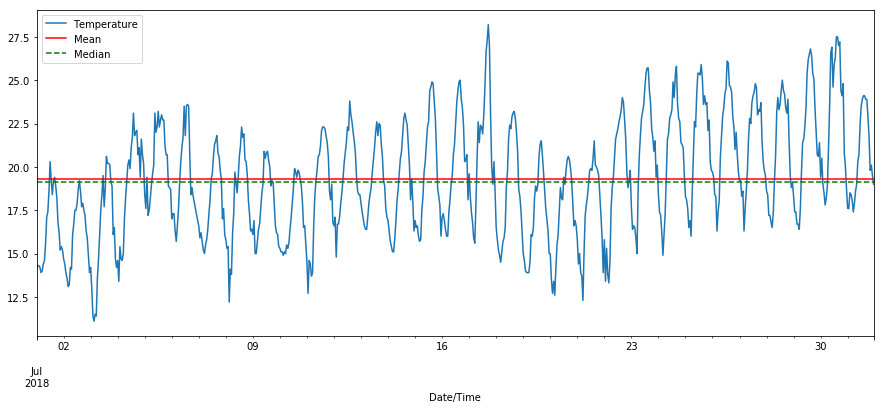

In [13]:
# We'll store the axes as ax so we can plot other stuff on it
ax = data.plot(x='Date/Time', y='Temp Interpolated (°C)', figsize=(15,6))

# axhline creates a horizontal line. Here's an exercise for you, how do we create vertical lines? Hint: Google.
ax.axhline(data['Temp Interpolated (°C)'].describe()['mean'], color='r') # mean 
ax.axhline(data['Temp Interpolated (°C)'].describe()['50%'], color='g', linestyle='--') # median

# Give our legend some labels
ax.legend(['Temperature', 'Mean', 'Median'])

## 6. Time Series Analysis

Process data, like weather data or stock market data, is a time series, which is a bunch of data points collected over time. Pandas makes it really easy to do various analyses on time series data.

Let's see what else we can do with pandas.

### Rolling Average

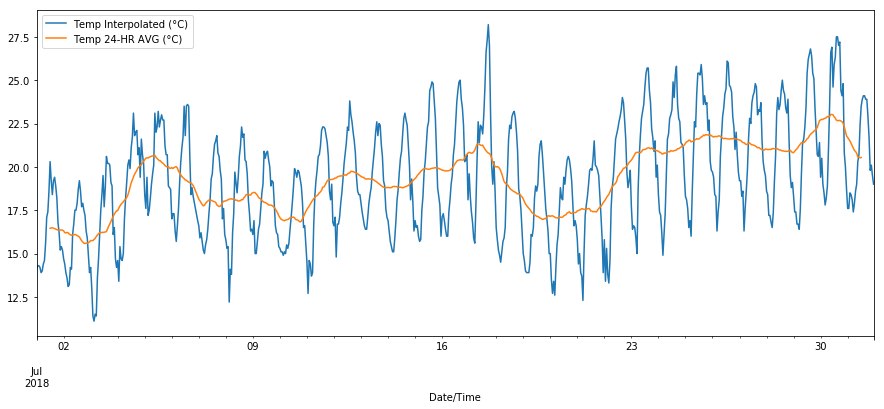

In [14]:
data['Temp 24-HR AVG (°C)'] = data['Temp Interpolated (°C)'].rolling(window=24,center=True).mean()
ax = data.plot(x='Date/Time', y=['Temp Interpolated (°C)', 'Temp 24-HR AVG (°C)'], figsize=(15,6))

## Filter by time

We'll implement a filter to get data from the second half of July 2018 using `strftime`. Here's a reference for [strftime](http://strftime.org), if you're wondering what the `%d-%b-%Y` is for:

In [15]:
from datetime import datetime

start_date = datetime.strptime('15-Jul-2018', '%d-%b-%Y')
data_filter = data['Date/Time'] >= start_date

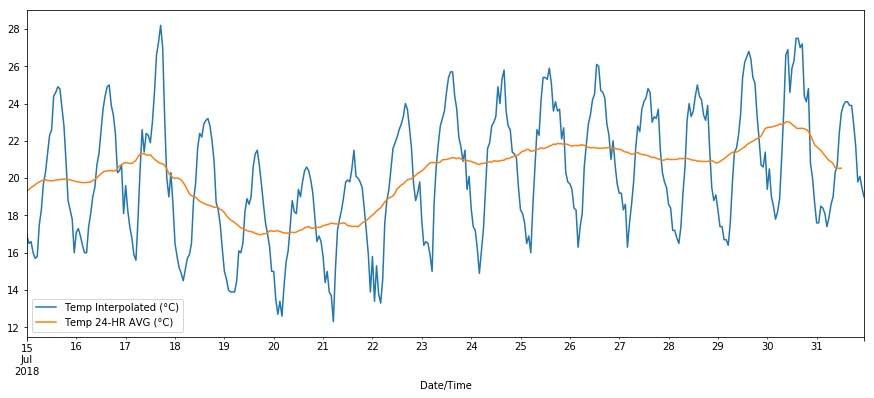

In [16]:
data.loc[data_filter].plot(x='Date/Time', y=['Temp Interpolated (°C)', 'Temp 24-HR AVG (°C)'], figsize=(15,6))

## 7. Exporting Data

Once you're done playing with your data set, you could export the `pandas` dataframe as a csv file as a backup using `to_csv()`:

In [17]:
data.head()

,Date/Time,Temp (°C),Temp Interpolated (°C),Temp 24-HR AVG (°C)
0,2018-07-01 00:00:00,14.1,14.1,NaN
1,2018-07-01 01:00:00,14.3,14.3,NaN
2,2018-07-01 02:00:00,14.3,14.3,NaN
3,2018-07-01 03:00:00,14.2,14.2,NaN
4,2018-07-01 04:00:00,13.9,13.9,NaN


In [18]:
data.to_csv('intro_weather_data.csv')

## References and Further Reading

1. [Some tricks for working with Environment Canada data](http://www.ubcenvision.com/blog/2017/11/30/jupyter-part1.html) from the UBC Envision blog
2. [Stats with Beer - Tutorial on Pandas](https://github.com/engineersCode/EngComp2_takeoff) by Lorena A. Barba and Natalia C. Clementi. Engineering Computations at the George Washington University, Mechanical and Aerospace Engineering department.
3. [Reference document for Python datetime formats with `strftime`](http://strftime.org/)